In [1]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

#%matplotlib notebook

# Function section:

In [2]:
#This function reads the data csv file and formats its data table.
def FileReader(File):
    dir_in = 'data'
    file_in = File
    
    if 'd' in File:
        column_names=['Year', 'Month', 'Day', 'Sea Level'] 
        DailyDf = pd.read_csv(os.path.join(dir_in, file_in), names=column_names)
        DailyDf['DateTime'] = pd.to_datetime(DailyDf[['Year', 'Month', 'Day']])
        DailyDf = DailyDf.set_index('DateTime')
        DailyDf['Sea Level'] = DailyDf['Sea Level'].replace(-32767, np.nan)
        
        File = DailyDf
        return DailyDf
    
    elif 'h' in File:
        column_names=['Year', 'Month', 'Day', 'Hour', 'Sea Level'] 
        HourlyDf = pd.read_csv(os.path.join(dir_in, file_in), names=column_names)
        HourlyDf['DateTime'] = pd.to_datetime(HourlyDf[['Year', 'Month', 'Day', 'Hour']])
        HourlyDf = HourlyDf.set_index('DateTime')
        HourlyDf['Sea Level'] = HourlyDf['Sea Level'].replace(-32767, np.nan)
        
        File = HourlyDf
        return HourlyDf      

In [3]:
#This function checks to see if the data is hourly or daily, and then plots it.
def DataPlotter(DataName, ChosenColor, marking):
    return DataName['Sea Level'].plot(color = ChosenColor, marker = marking)
        

    

# Dataframe section:

In [4]:
#Intializes the dataframes.
DailyDf = FileReader('d274.csv')
HourlyDf = FileReader('h274.csv')

# Data timetable section:

In [5]:
DailyDf

,Year,Month,Day,Sea Level
DateTime,,,,
1961-11-02,1961,11,2,3215.0
1961-11-03,1961,11,3,3567.0
1961-11-04,1961,11,4,3991.0
1961-11-05,1961,11,5,3511.0
1961-11-06,1961,11,6,3287.0
...,...,...,...,...
2019-12-15,2019,12,15,2375.0
2019-12-16,2019,12,16,2713.0
2019-12-17,2019,12,17,2796.0


In [6]:
HourlyDf

,Year,Month,Day,Hour,Sea Level
DateTime,,,,,
1961-11-01 07:00:00,1961,11,1,7,4210.0
1961-11-01 08:00:00,1961,11,1,8,4110.0
1961-11-01 09:00:00,1961,11,1,9,3760.0
1961-11-01 10:00:00,1961,11,1,10,3170.0
1961-11-01 11:00:00,1961,11,1,11,2540.0
...,...,...,...,...,...
2019-12-20 07:00:00,2019,12,20,7,3599.0
2019-12-20 08:00:00,2019,12,20,8,3620.0
2019-12-20 09:00:00,2019,12,20,9,3318.0


# Data description section:

In [7]:
DailyDf.describe()

,Year,Month,Day,Sea Level
count,21232.000000,21232.000000,21232.000000,19255.000000
mean,1990.400198,6.534052,15.724567,2701.535705
std,16.781142,3.452698,8.798851,253.230223
min,1961.000000,1.000000,1.000000,1850.000000
25%,1976.000000,4.000000,8.000000,2524.000000
50%,1990.000000,7.000000,16.000000,2681.000000
75%,2005.000000,10.000000,23.000000,2876.000000
max,2019.000000,12.000000,31.000000,3991.000000


In [8]:
HourlyDf.describe()

,Year,Month,Day,Hour,Sea Level
count,509597.000000,509597.00000,509597.000000,509597.000000,464387.000000
mean,1990.399891,6.53433,15.724176,11.499975,2701.468674
std,16.781719,3.45272,8.798837,6.922165,1183.364656
min,1961.000000,1.00000,1.000000,0.000000,-477.000000
25%,1976.000000,4.00000,8.000000,6.000000,1670.000000
50%,1990.000000,7.00000,16.000000,11.000000,2750.000000
75%,2005.000000,10.00000,23.000000,17.000000,3730.000000
max,2019.000000,12.00000,31.000000,23.000000,5920.000000


# Data plot section:

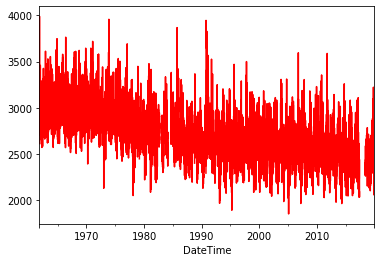

In [9]:
DataPlotter(DailyDf, 'red','')

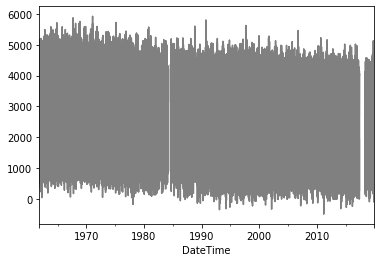

In [10]:
DataPlotter(HourlyDf, 'gray', '')

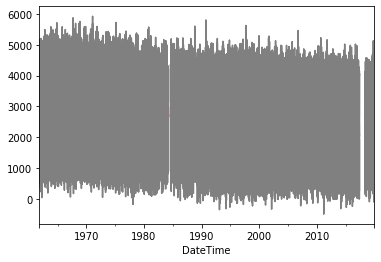

In [11]:
DataPlotter(DailyDf, 'red', '')
DataPlotter(HourlyDf, 'gray', '')

(0, 4800)

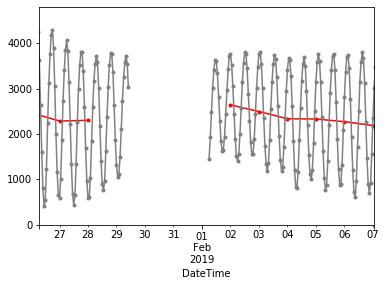

In [12]:
ax = DataPlotter(DailyDf, 'red', '.')
ax.set_xlim(pd.Timestamp('2019-01-26'), pd.Timestamp('2019-02-07'))

ax = DataPlotter(HourlyDf, 'gray', '.')
ax.set_xlim(pd.Timestamp('2019-01-26-07:00:00'), pd.Timestamp('2019-02-07-01:00:00'))
ax.set_ylim(0, 4800)

(0, 5500)

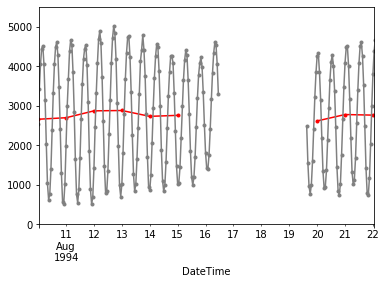

In [13]:
ax = DataPlotter(DailyDf, 'red', '.')
ax.set_xlim(pd.Timestamp('1994-08-10'), pd.Timestamp('1994-08-22'))

ax = DataPlotter(HourlyDf, 'gray', '.')
ax.set_xlim(pd.Timestamp('1994-08-10-01:00:00'), pd.Timestamp('1994-08-22-01:00:00'))
ax.set_ylim(0, 5500)

(0, 5900)

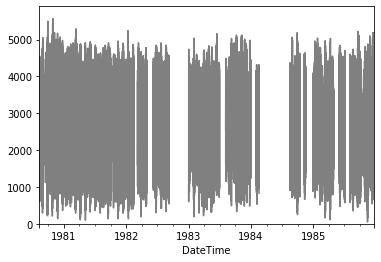

In [14]:
ax = DataPlotter(HourlyDf, 'gray', '')
ax.set_xlim(pd.Timestamp('1980-08-10-01:00:00'), pd.Timestamp('1985-12-22-01:00:00'))
ax.set_ylim(0, 5900)

# Testing section:

In [15]:
Difference = DailyDf.describe() - HourlyDf.describe()
Difference

,Day,Hour,Month,Sea Level,Year
count,-488365.000000,NaN,-488365.000000,-445132.000000,-488365.000000
mean,0.000391,NaN,-0.000278,0.067031,0.000307
std,0.000013,NaN,-0.000022,-930.134433,-0.000577
min,0.000000,NaN,0.000000,2327.000000,0.000000
25%,0.000000,NaN,0.000000,854.000000,0.000000
50%,0.000000,NaN,0.000000,-69.000000,0.000000
75%,0.000000,NaN,0.000000,-854.000000,0.000000
max,0.000000,NaN,0.000000,-1929.000000,0.000000


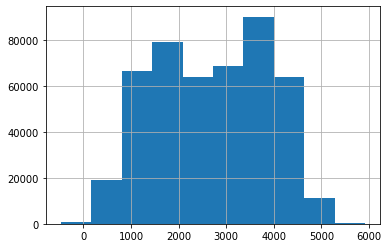

In [16]:
HourlyDf['Sea Level'].hist()

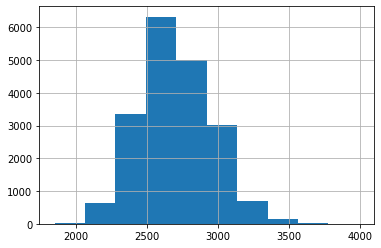

In [17]:
DailyDf['Sea Level'].hist()

ValueError: 'color' kwarg must be an mpl color spec or sequence of color specs.
For a sequence of values to be color-mapped, use the 'c' argument instead.

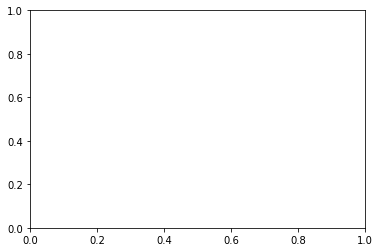

In [27]:
plt.scatter(DailyDf['Day'],  DailyDf['Sea Level'], color = 'red' 'green')
